Import Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import datasets

Pustaka Fungsi myConvexHull

In [2]:
# Fungsi Pembantu myConvexHull

def isPointAbove(point1, point2, testPoint):
    # Mengembalikan True jika testPoint berada di atas garis yang dibentuk point1

    # Menegatifkan determinan jika point2 berada di kanan point1
    multiplier = 1
    if point2[0] > point1[0]:
        multiplier = -1

    # Mencari determinan
    A = point1[0] * point2[1]
    B = testPoint[0] * point1[1]
    C = point2[0] * testPoint[1]
    D = testPoint[0] * point2[1]
    E = point2[0] * point1[1]
    F = point1[0] * testPoint[1]
    return np.round(multiplier * (A + B + C - D - E - F),9) > 0
    
def isPointBelow(point1, point2, testPoint):
    # Mengembalikan True jika testPoint berada di bawah garis yang dibentuk point1 dan 

    # Menegatifkan determinan jika point2 berada di kanan point1
    multiplier = 1
    if point2[0] > point1[0]:
        multiplier = -1

    # Mencari determinan
    A = point1[0] * point2[1]
    B = testPoint[0] * point1[1]
    C = point2[0] * testPoint[1]
    D = testPoint[0] * point2[1]
    E = point2[0] * point1[1]
    F = point1[0] * testPoint[1]
    return np.round(multiplier * (A + B + C - D - E - F),9) < 0

def distanceToPoint(linePoint1, linePoint2, point3):
    # Mengembalikan jarak antara garis yang dibentuk linePoint1 dan linePoint2 dengan point3
    A = linePoint2[0] - linePoint1[0]
    B = linePoint1[1] - point3[1]
    C = linePoint1[0] - point3[0]
    D = linePoint2[1] - linePoint1[1]
    
    if (A == 0 and D == 0) :
        return math.sqrt((B*B) + (C*C))
    else:
        return np.round(abs((A*B) - (C*D)) / math.sqrt((A*A) + (D*D)),9)

def angleBetweenPoint(point1, point2, point3):
    # Mengembalikan sudut yang terbentuk dari point1, point3, dan point2
    ABx = point3[0] - point1[0]
    BCx = point2[0] - point3[0]
    ABy = point3[1] - point1[1]
    BCy = point2[1] - point3[1]

    lenAB = math.sqrt(ABx*ABx + ABy*ABy)
    lenBC = math.sqrt(BCx*BCx + BCy*BCy)

    if (lenAB == 0 or lenBC == 0):
        return 0
    else:
        return np.round(np.arccos( (ABx*BCx + ABy*BCy) / (lenAB*lenBC) ),9)

def upperConvexHull(point1, point2, points):
    # Mengembalikan Convex Hull bagian atas

    # Hapus point yang tidak berada di atas garis yang dibentuk point1 dan point2
    aboveFilter = []
    for i in points:
        if isPointAbove(point1, point2, i) and i[2] != point1[2] and i[2] != point2[2]:
            aboveFilter.append(True)
        else:
            aboveFilter.append(False)
    points = points[aboveFilter]

    if (len(points) == 0):
        # Tidak ada point di atas garis
        return [[point1, point2]]
    else:
        # Cari point dengan jarak terbesar dari garis yang dibentuk point1 dan point2
        farthestPoint = points[0]
        farthestDistance = 0
        for i in range(len(points)):
            if distanceToPoint(point1, point2, points[i]) > farthestDistance or (distanceToPoint(point1, point2, points[i]) == farthestDistance and angleBetweenPoint(point1, points[i], point2) > angleBetweenPoint(point1, farthestPoint, point2)):
                farthestPoint = points[i]
                farthestDistance = distanceToPoint(point1, point2, points[i])
        return upperConvexHull(point1, farthestPoint, points) + upperConvexHull(point2, farthestPoint, points)


def lowerConvexHull(point1, point2, points):
    # Mengembalikan Convex Hull bagian bawah

    # Hapus point yang tidak berada di bawah garis yang dibentuk point1 dan point 
    lowerFilter = []
    for i in points:
        if isPointBelow(point1, point2, i) and i[2] != point1[2] and i[2] != point2[2]:
            lowerFilter.append(True)
        else:
            lowerFilter.append(False)
    points = points[lowerFilter]

    if (len(points) == 0):
        # Tidak ada point di atas garis
        return [[point1, point2]]
    else:
        # Cari point dengan jarak terbesar dari garis yang dibentuk point1 dan point2
        farthestPoint = points[0]
        farthestDistance = 0
        for i in range(len(points)):
            if distanceToPoint(point1, point2, points[i]) > farthestDistance or (distanceToPoint(point1, point2, points[i]) == farthestDistance and angleBetweenPoint(point1, point2, points[i]) > angleBetweenPoint(point1, point2, farthestPoint)):
                farthestPoint = points[i]
                farthestDistance = distanceToPoint(point1, point2, points[i])
        return lowerConvexHull(point1, farthestPoint, points) + lowerConvexHull(point2, farthestPoint, points)


In [3]:
# myConvexHull Function
def myConvexHull(bucket):
    # Mengembalikan garis yang membentuk Convex Hull 
    # Garis dinyatakan dengan format [[indexTitik1,indexTitik2], ....]
    # Prasyarat: di luar fungsi, bucket harus diurutkan berdasarkan absis dan
    # ordinat secara ascending sebelum ditampilkan dalam grafik
    if (len(bucket) > 1):
        # Cari titik ekstrim
        bucket = sorted(bucket, key=lambda x: (x[0], x[1]))
        bucket = np.array([np.append(bucket[i],i) for i in range(0, len(bucket))])
        leftExtremePoint = bucket[0]
        rightExtremePoint = bucket[-1]

        # Convex Hull bagian atas
        upperConvexHullPoints = np.array(upperConvexHull(leftExtremePoint, rightExtremePoint, bucket))
        # Convex Hull bagian bawah
        lowerConvexHullPoints = np.array(lowerConvexHull(leftExtremePoint, rightExtremePoint, bucket))
        # Gabung Convex Hull bagian atas dan bagian bawah
        return np.concatenate((upperConvexHullPoints[:,:,2], lowerConvexHullPoints[:,:,2]), axis=0).astype('int32')
    else:
        # Jika jumlah titik <= 1, mengembalikan array kosong
        return []
   

Percobaan dan Demonstrasi Penggunaan myConvexHull

Dataset Iris

In [4]:
# Load iris dataset
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


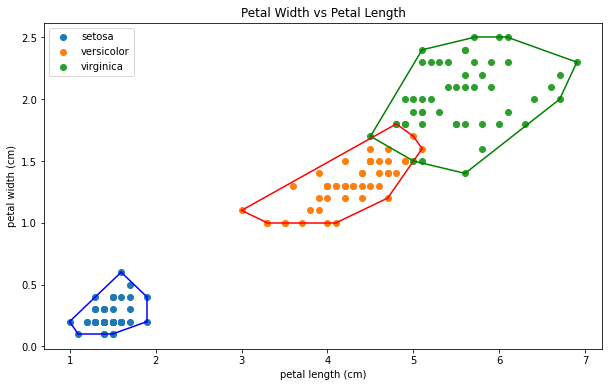

In [5]:
# Visualisasi hasil ConvexHull dataset iris Petal Width vs Petal Length
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()

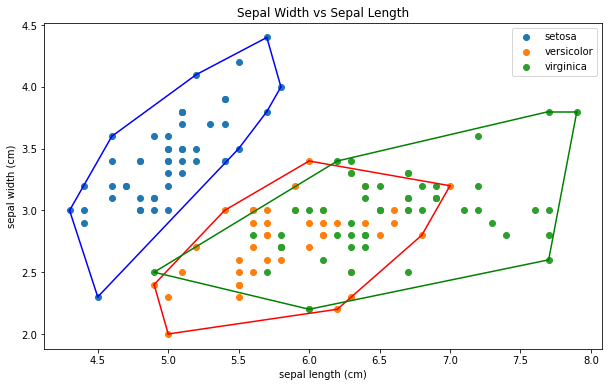

In [6]:
# Visualisasi hasil ConvexHull dataset iris Sepal Width vs Sepal Length
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()

Dataset Digits

In [7]:
# Load digits dataset
digitsData = datasets.load_digits()

digitsDf = pd.DataFrame(digitsData.data, columns=digitsData.feature_names)
digitsDf['Target'] = pd.DataFrame(digitsData.target)
digitsDf.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


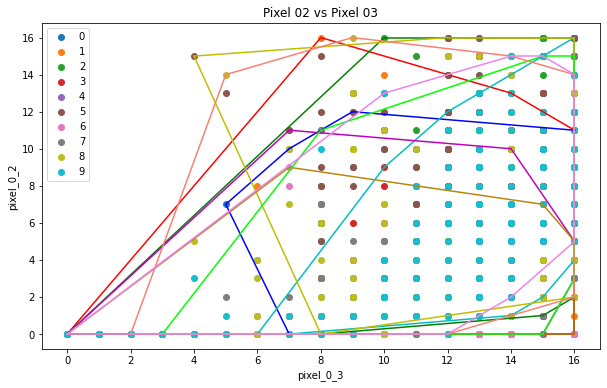

In [8]:
# Visualisasi hasil ConvexHull dataset digits Pixel 02 vs Pixel 03

plt.figure(figsize = (10, 6))
colors = ['b','r','g','c','m','y','darkgoldenrod','lime','salmon','violet']

plt.title('Pixel 02 vs Pixel 03')
plt.xlabel(digitsData.feature_names[3])
plt.ylabel(digitsData.feature_names[2])

for i in range(len(digitsData.target_names)):
    bucket = digitsDf[digitsDf['Target'] == i]
    bucket = bucket.iloc[:,[3,2]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=digitsData.target_names[i])
    for simplex in hull:
       plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.legend()

Dataset Wine

In [9]:
# Load wine dataset
wineData = datasets.load_wine()

wineDf = pd.DataFrame(wineData.data, columns=wineData.feature_names)
wineDf['Target'] = pd.DataFrame(wineData.target)
wineDf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


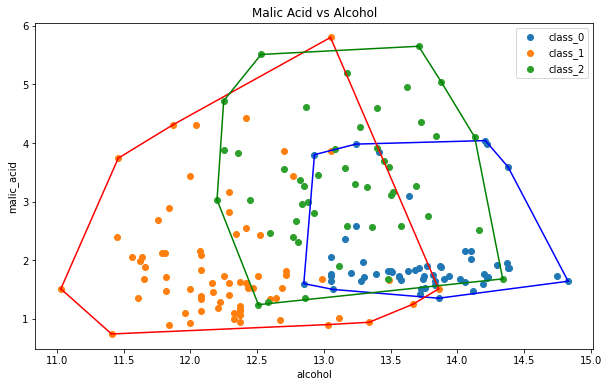

In [10]:
# Visualisasi hasil ConvexHull dataset wine Malic Acid vs Alcohol
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

plt.title('Malic Acid vs Alcohol')
plt.xlabel(wineData.feature_names[0])
plt.ylabel(wineData.feature_names[1])

for i in range(len(wineData.target_names)):
    bucket = wineDf[wineDf['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=wineData.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()

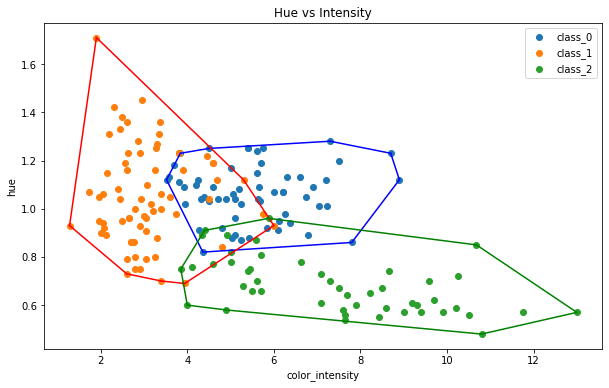

In [11]:
# Visualisasi hasil ConvexHull dataset wine Hue vs Color Intensity
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

plt.title('Hue vs Color Intensity')
plt.xlabel(wineData.feature_names[9])
plt.ylabel(wineData.feature_names[10])

for i in range(len(wineData.target_names)):
    bucket = wineDf[wineDf['Target'] == i]
    bucket = bucket.iloc[:,[9,10]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=wineData.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()

Dataset Breast Cancer

In [12]:
# Load breast cancer dataset
bcData = datasets.load_breast_cancer()

bcDf = pd.DataFrame(bcData.data, columns=bcData.feature_names)
bcDf['Target'] = pd.DataFrame(bcData.target)
bcDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


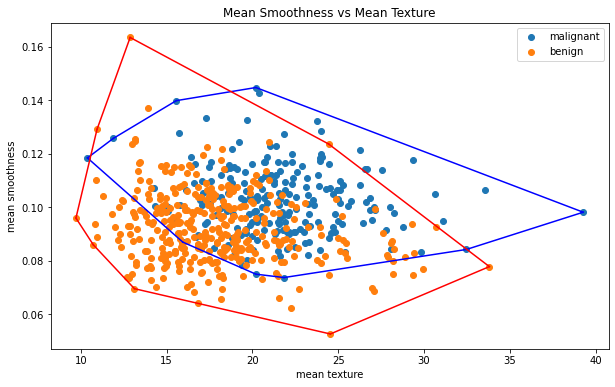

In [13]:
# Visualisasi hasil ConvexHull dataset breast cancer Mean Smoothness vs Mean Texture
plt.figure(figsize = (10, 6))
colors = ['b','r']

plt.title('Mean Smoothness vs Mean Texture')
plt.xlabel(bcData.feature_names[1])
plt.ylabel(bcData.feature_names[4])

for i in range(len(bcData.target_names)):
    bucket = bcDf[bcDf['Target'] == i]
    bucket = bucket.iloc[:,[1,4]].values
    hull = myConvexHull(bucket)
    bucket = np.array(sorted(bucket, key=lambda x: (x[0], x[1])))
    plt.scatter(bucket[:, 0], bucket[:, 1], label=bcData.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        
plt.legend()